In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("data_b.txt", delim_whitespace=True).to_numpy()

In [3]:
def plot_decision_boundary(X, Y, theta):
    x = np.arange(X[:,1:].min(), X[:,1:].max(), 0.001)
    plt.plot(x, (1/theta[2])*(-theta[0]-theta[1]*x), 'g--')
    for j in range(X.shape[0]):
        if (Y[j] < 0):
            plt.plot(X[j, 1], X[j, 2], 'bo')
        else:
            plt.plot(X[j, 1], X[j, 2], 'ro')
    plt.show()

==== Training model on data set A ====
0.23945685970631964
-0.22359426346813277
Converged in 8056 iterations


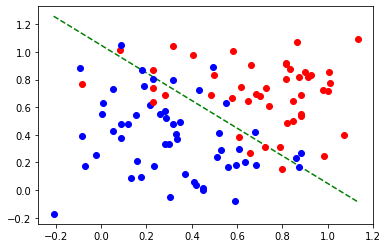


==== Training model on data set B ====
0.25953714847506276
-0.2661011389169753
Finished 10000 iterations
Finished 20000 iterations
Converged in 25245 iterations


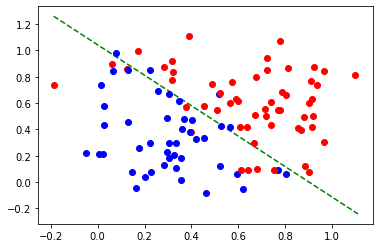

In [23]:
from __future__ import division
import numpy as np

try:
    xrange
except NameError:
    xrange = range

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

# Calculating gradient with norm-2 regularization. Regularized Loss = Loss + (lambda/2) * (||theta||)^2
def calc_grad_with_reg(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)
    
    l = 1 # lambda parameter of the l2 regularization

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * ((X.T.dot(probs * Y)) - l * theta)
    
    return grad

def logistic_loss_with_reg(X, Y, theta, l = 1):
    result = 0
    for i in range(X.shape[0]):
        result += np.log(1 + np.exp(-Y[i] * (X[i,:]@theta)))
    return (1/X.shape[0]) * result + l/2 * np.sum(theta*theta)

def zero_mean_gaussian_noise(m):    
    noise = np.random.normal(0, 0.1, m)
    print(str(np.amax(noise)))
    print(str(np.amin(noise)))
    return noise

def logistic_regression(X, Y):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10 # (i) Using a different constant learning rate
    
    X += zero_mean_gaussian_noise(X.shape[0]).reshape(X.shape[0], 1)

    i = 0
    while True:
        i += 1
        prev_theta = theta
#         grad = calc_grad_with_reg(X, Y, theta)
        grad = calc_grad(X, Y, theta)
        
#         decay = 0.001
#         learning_rate = learning_rate * (1/(1+decay*i)) # Decreasing the learning rate over time
        
        theta = theta  - learning_rate * (grad)
        if i % 10000 == 0:
            print('Finished %d iterations' % i)

        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            plot_decision_boundary(X, Y, theta)
            break
            
        # Break if i == 200000
        if (i == 200000):
            plot_decision_boundary(X, Y, theta)
            break
            
    return

def main():
    print('==== Training model on data set A ====')
    Xa, Ya = load_data('data_a.txt')
    logistic_regression(Xa, Ya)

    print('\n==== Training model on data set B ====')
    Xb, Yb = load_data('data_b.txt')
    logistic_regression(Xb, Yb)

    return

if __name__ == '__main__':
    main()